In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Entropy of Mixing
If we assume mixing simply takes us from one pure substance's Gibbs energy to another pure substance's Gibbs energy
$$G = (1-x) G_A^{\circ} + x G_B^{\circ}$$

If we take into account the entropy of mixing (Ch. 2), things are a bit different. Assume that both substances takes up a volume $v$ for each particle (atom, molecule, etc.) of that substance. Then, the volume of substance A is $V_A=N_A(1-x)v$. The volume of substance B is $V_B = N_Bxv$.

<img src="https://ch302.cm.utexas.edu/images302/gas-mixing.png">

When the partition is removed, substance A on the left changes entropy based on its volume change. Let's assume that liquids and gases can be described like the ideal gas by $S = Nk\left(\ln (V) + \rm{non-volume~terms}\right)$. In a $\Delta S$ calculation, the non-volume terms would cancel.

$$\begin{align}
\Delta S_A &= S_{fA} - S_{iA}\\
&= N_Ak \ln\left( \frac{V_{fA}}{V_{iA}}\right)\\
&= N_Ak \ln\left( \frac{N_Av}{N_A(1-x)v}\right)\\
&= N_Ak \ln\left( \frac{1}{1-x}\right)
\end{align}$$

The number of A particles is $N_A = (1-x)N$. Therefore, the change in entropy of substance A is

$$\Delta S_A= (1-x)Nk \ln\left( \frac{1}{1-x}\right)$$

or

$$\Delta S_A= -(1-x)Nk \ln\left( 1-x\right)$$

**<font color=red>Can you determine the change in entropy of substance B? Write it below.</font>**





The total change in entropy due to mixing is

$$\begin{align}
\Delta S_{mixing} &= \Delta S_A + \Delta S_B\\
\\
\Delta S_{mixing} &= -Nk\left[(1-x) \ln\left( 1-x\right) + x\ln\left(x\right)\right]
\end{align}$$

If we add this entropic change as a reduction in Gibbs energy in energy/mol ($Nk = 1R$), we get

$$G = (1-x) G_A^{\circ} + x G_B^{\circ}+RT\left[(1-x) \ln\left( 1-x\right) + x\ln\left(x\right)\right]$$

Let's plot the no mixing and ideal mixing cases. To begin, try to plot for values of $0\le x\le 1$. Below,
* fill in the values of `x`,
* the equation for no mixing `Gnomix`,
* the equation for ideal mixing `Gmix`, and
* the equation for the change in entropy due to mixing `DSmix`.

<font color=red>What happens to the ideal mixing? Why?</font>

Make your `x` values go from 0.001, to 0.999 to avoid infinities.

In [2]:
R = 8.314
T = 300
GoA = 0
GoB = 1000
x = np.linspace(0.001, 0.999, 1000)
Gnomix = (1-x)*GoA + x*GoB
Gmix = (1-x)*GoA + x*GoB + R*T*(x*np.log(x) + (1-x)*np.log(1-x))
DSmix = -R*T*(x*np.log(x) + (1-x)*np.log(1-x))

Below, you can shift-enter to plot the Gibbs energies. Discuss the differences. What happens as you change the temperature? Try 10 K. Try 1000 K.

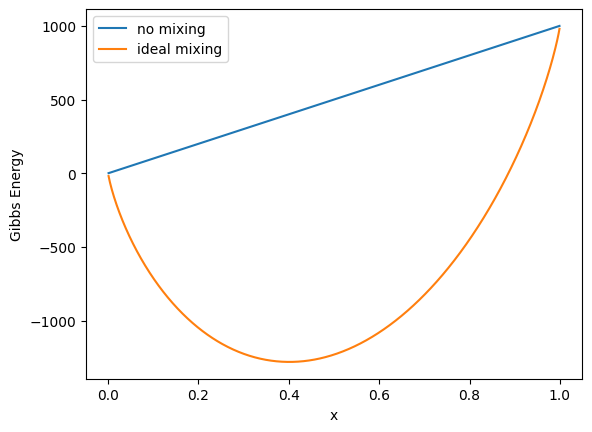

In [3]:
plt.plot(x, Gnomix, label='no mixing')
plt.plot(x, Gmix, label='ideal mixing')
plt.xlabel('x')
plt.ylabel('Gibbs Energy')
plt.legend()
plt.show()

Below, you can shift-enter to plot the change in entropy due to mixing. Discuss what this plot tells you. For example, why is the change in entropy symmetric about the middle, but the Gibbs energy is not symmetric about the middle?

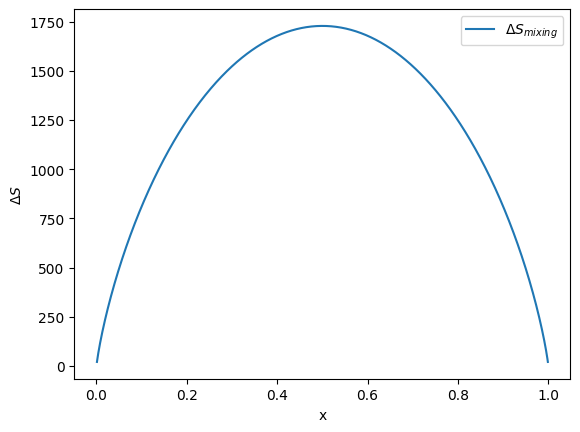

In [4]:
plt.plot(x, DSmix, label=r'$\Delta S_{mixing}$')
plt.xlabel('x')
plt.ylabel(r'$\Delta S$')
plt.legend()
plt.show()

Let's add attractive and repulsive energy contributions as descibed in the text. Attractive energies $\Delta U < 0$ mean that the mixing leads to stronger bonding between the mixtures than between the pure substances. Repulsive energies $\Delta U > 0$ mean the two substances do not mix well. Oil and water is an extreme example.

Below are two $\Delta U$, one attractive, one repulsive. Plot those (shift-enter) to see their shapes.

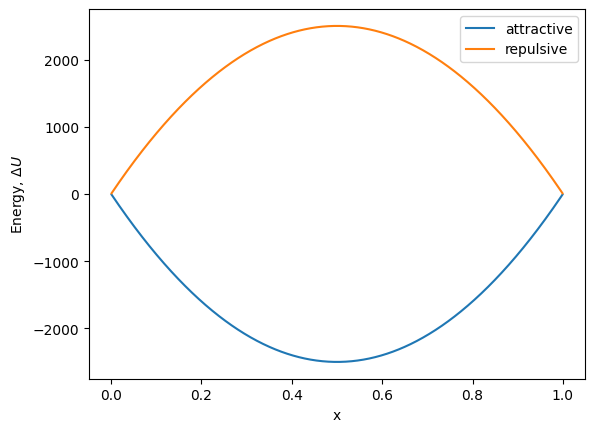

In [5]:
strength = 10000 #strength of DU
DUA = strength * (x-0.5)**2 - strength * 0.5**2 #attractive
DUR = strength * (x-x**2) #repulsive

plt.plot(x, DUA, label='attractive')
plt.plot(x, DUR, label='repulsive')
plt.xlabel('x')
plt.ylabel(r'Energy, $\Delta U$')
plt.legend()
plt.show()

Now, put it together with the Gibbs energy of ideal mixing.

$$G = (1-x) G_A^{\circ} + x G_B^{\circ}+RT\left[(1-x) \ln\left( 1-x\right) + x\ln\left(x\right)\right] + \Delta U$$

In the code cell below,
* plot ideal mixing, `Gmix` vs. `x`.
* plot ideal mixing plus attraction, `Gmix + DUA` vs. `x`.
* plot ideal mixing plus repulsion, `Gmix + DUR` vs. `x`.

Discuss your observations of these graphs. What happens if you increase or decrease the `strength` of attraction and repulsion above?

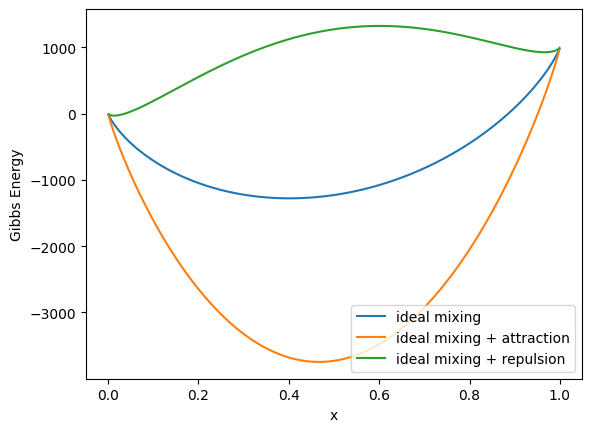

In [6]:
plt.plot(x, Gmix, label='ideal mixing')
plt.plot(x, Gmix+DUA, label='ideal mixing + attraction')
plt.plot(x, Gmix+DUR, label='ideal mixing + repulsion')
plt.xlabel('x')
plt.ylabel('Gibbs Energy')
plt.legend()
plt.show()

Below will recreate code from above so you have control in a single cell. The plotting will plot five different temperatures. Since the entropy of mixing is temperature-dependent, there will be a trade-off between entropic energy reductions and the repulsive mixing energy. Describe what you observe.

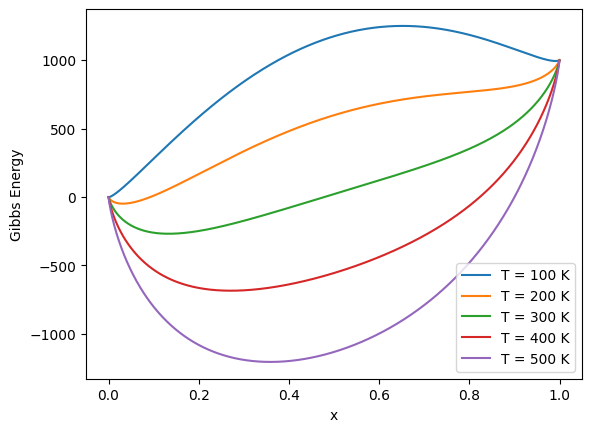

In [7]:
R = 8.314
GoA = 0
GoB = 1000
x = np.linspace(0.0001, 0.9999, 1000)
T = np.linspace(100, 500, 5)
#### mixing energy contribution ###
strength = 5000 #strength of DU
DUA = strength * (x-0.5)**2 - strength * 0.5**2 #attractive
DUR = strength * (x-x**2) #repulsive
### Make a graph ###
for i in T:
  ### Gibbs energy with ideal mixing ###
  Gmix = (1-x)*GoA + x*GoB + R*i*(x*np.log(x) + (1-x)*np.log(1-x))
  Tstr = str(int(i))
  plt.plot(x, Gmix+DUR, label='T = '+ Tstr +' K')

plt.xlabel('x')
plt.ylabel('Gibbs Energy')
plt.legend()
plt.show()

Copy the previous code in the cell below, and change the `plt.plot` line to plot the attractive mixing energy. Describe what you observe.

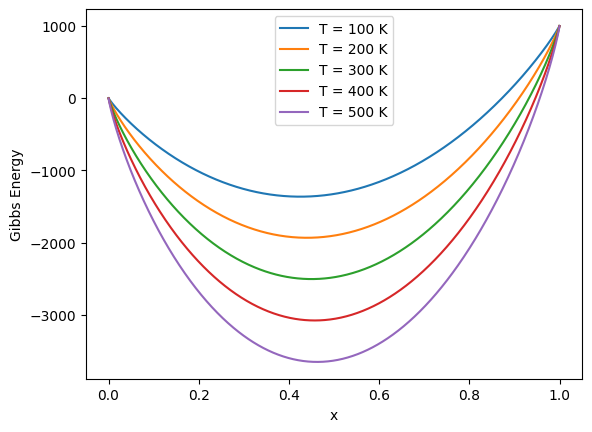

In [ ]:
R = 8.314
GoA = 0
GoB = 1000
x = np.linspace(0.0001, 0.9999, 1000)
T = np.linspace(100, 500, 5)
#### mixing energy contribution ###
strength = 5000 #strength of DU
DUA = strength * (x-0.5)**2 - strength * 0.5**2 #attractive
DUR = strength * (x-x**2) #repulsive
### Make a graph ###
for i in T:
  ### Gibbs energy with ideal mixing ###
  Gmix = (1-x)*GoA + x*GoB + R*i*(x*np.log(x) + (1-x)*np.log(1-x))
  Tstr = str(int(i))
  plt.plot(x, Gmix+DUA, label='T = '+ Tstr +' K')

plt.xlabel('x')
plt.ylabel('Gibbs Energy')
plt.legend()
plt.show()

Looking back at the case where the $\Delta U > 0$, we can investigate how the concave down (unstable) region changes with temperature. This region of instability is where two substances will phase separate into concentrations $x_A$ and $x_B$. There will not be homogeneous mixtures in this range of concentrations.

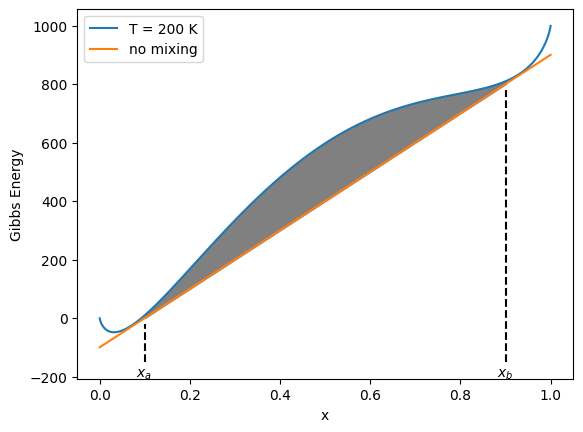

In [ ]:
# @title Code to plot instability at 200 K
R = 8.314
T = 200
GoA = 0
GoB = 1000
x = np.linspace(0.0001, 0.9999, 1000)
#### mixing energy contribution ###
strength = 5000 #strength of DU
DUA = strength * (x-0.5)**2 - strength * 0.5**2 #attractive
DUR = strength * (x-x**2) #repulsive
Gnomix = -100 + x*1000
Gmix = (1-x)*GoA + x*GoB + R*T*(x*np.log(x) + (1-x)*np.log(1-x))
plt.plot(x, Gmix+DUR, label='T = 200 K')
plt.plot(x, Gnomix, label='no mixing')
fillx = (x >= 0.1) & (x <= 0.9)# x[(x >= 0.1) & (x <= 0.9)]
plt.fill_between(x, Gmix+DUR, Gnomix, where=(fillx), color='gray')
plt.vlines(0.1, -150, -20, color='k', linestyle='dashed')
plt.vlines(0.9, -150, 780, color='k', linestyle='dashed')
plt.text(0.08, -200, r'$x_a$')
plt.text(0.88, -200, r'$x_b$')
plt.xlabel('x')
plt.ylabel('Gibbs Energy')
plt.legend()
plt.show()

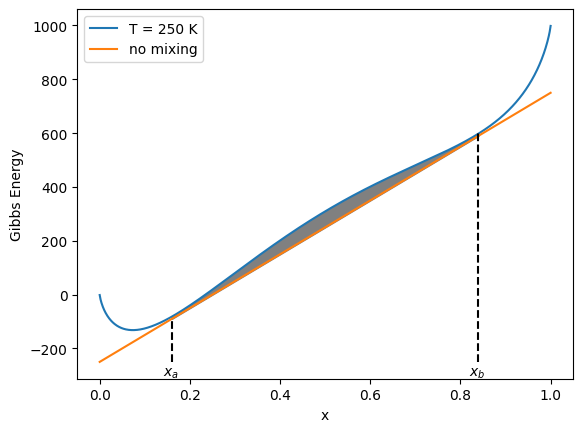

In [ ]:
# @title Code to plot instability at 250 K
R = 8.314
T = 250
GoA = 0
GoB = 1000
x = np.linspace(0.0001, 0.9999, 1000)
#### mixing energy contribution ###
strength = 5000 #strength of DU
DUA = strength * (x-0.5)**2 - strength * 0.5**2 #attractive
DUR = strength * (x-x**2) #repulsive
Gnomix = -250 + x*1000
Gmix = (1-x)*GoA + x*GoB + R*T*(x*np.log(x) + (1-x)*np.log(1-x))
plt.plot(x, Gmix+DUR, label='T = 250 K')
plt.plot(x, Gnomix, label='no mixing')
fillx = (x >= 0.16) & (x <= 0.84)# x[(x >= 0.1) & (x <= 0.9)]
plt.fill_between(x, Gmix+DUR, Gnomix, where=(fillx), color='gray')
plt.vlines(0.16, -250, -90, color='k', linestyle='dashed')
plt.vlines(0.84, -250, 600, color='k', linestyle='dashed')
plt.text(0.14, -300, r'$x_a$')
plt.text(0.82, -300, r'$x_b$')
plt.xlabel('x')
plt.ylabel('Gibbs Energy')
plt.legend()
plt.show()